# Proyecto Statistical Learning I
##### Autor: Lilian Rebeca Carrera Lemus


## 2.  Parte 2 (Deployment , Inferencia y Predicción) 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from joblib import load
from scipy.stats import norm
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


Como primer paso cargaremos los mejores modelos seleccionados en la primera parte del proyecto

In [6]:
# Cargar los mejores cuatro modelos
modelo_arbol = load("modelos/best_arbol(max_depth = None, min_samples_split = 3, min_samples_leaf = 15).joblib")
modelo_svm = load("modelos/best_svm(C = 100.0, kernel = 'rbf').joblib")
modelo_bayes = load("modelos/best_bayes(priors=None, var_smoothing=1e-08).joblib")
modelo_reglog = load("modelos/best_reglog(lr=0.01, epoch=10000, imp_error=10000, lambda=0.05, 'Lasso', bach_size=32).joblib")

In [8]:
#Cargamos los datos que se van a utilizar, ya con la ingeniería de características aplicada en la fase1
# Para los datos de x
x_test = load("testdata.joblib")
# Para los datos de y
y_test = load('var_objetivo.joblib')

In [27]:
# Funcion para calcular predicciones individuales
## Se utiliza el index del dataset de prueba para hacer las predicciones una por una. i = índice de la observación
def predecir(x_data, y_data, i):
    
    x = x_data.iloc[i]
    y = y_data.iloc[i]
    x = np.array(x).reshape(1,-1)
    
    #Predicción para árboles de desición
    prediccion_arbol = np.int(modelo_arbol.predict(x))
    #Predicción para support vector machine
    prediccion_svm = np.int(modelo_svm.predict(x))
    #Predicción para modelo de Naive Bayes
    prediccion_bayes = np.int(modelo_bayes.predict(x))
    #Predicción para regresión logística
    x_reglog = np.append(1,x)
    logit = np.dot(x_reglog, modelo_reglog.squeeze())
    prob_reglog =  1/(1 + np.exp(-logit))
    prediccion_reglog = np.int(round(prob_reglog))
    
    
    predicciones = [prediccion_arbol,prediccion_svm, prediccion_bayes, prediccion_reglog]
    labels = {0:"Died", 1:"Survived"}
    
    prediccion = np.int(mode(predicciones)[0])
    
    print("Predicción:",labels.get(prediccion))
    print("Valor Real:", labels.get(y))
    print("Probabilidad Regresión Logística:", prob_reglog)
    print("Naive Bayes:", prediccion_bayes)


    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
    
    plot_tree(modelo_arbol, feature_names = list(x_data.columns), filled = True, proportion = True)
    
    fig.savefig('arbol.png')
    
    return prediccion

Predicción: Survived
Valor Real: Survived
Probabilidad Regresión Logística: 0.7262785555579324
Naive Bayes: 1


1

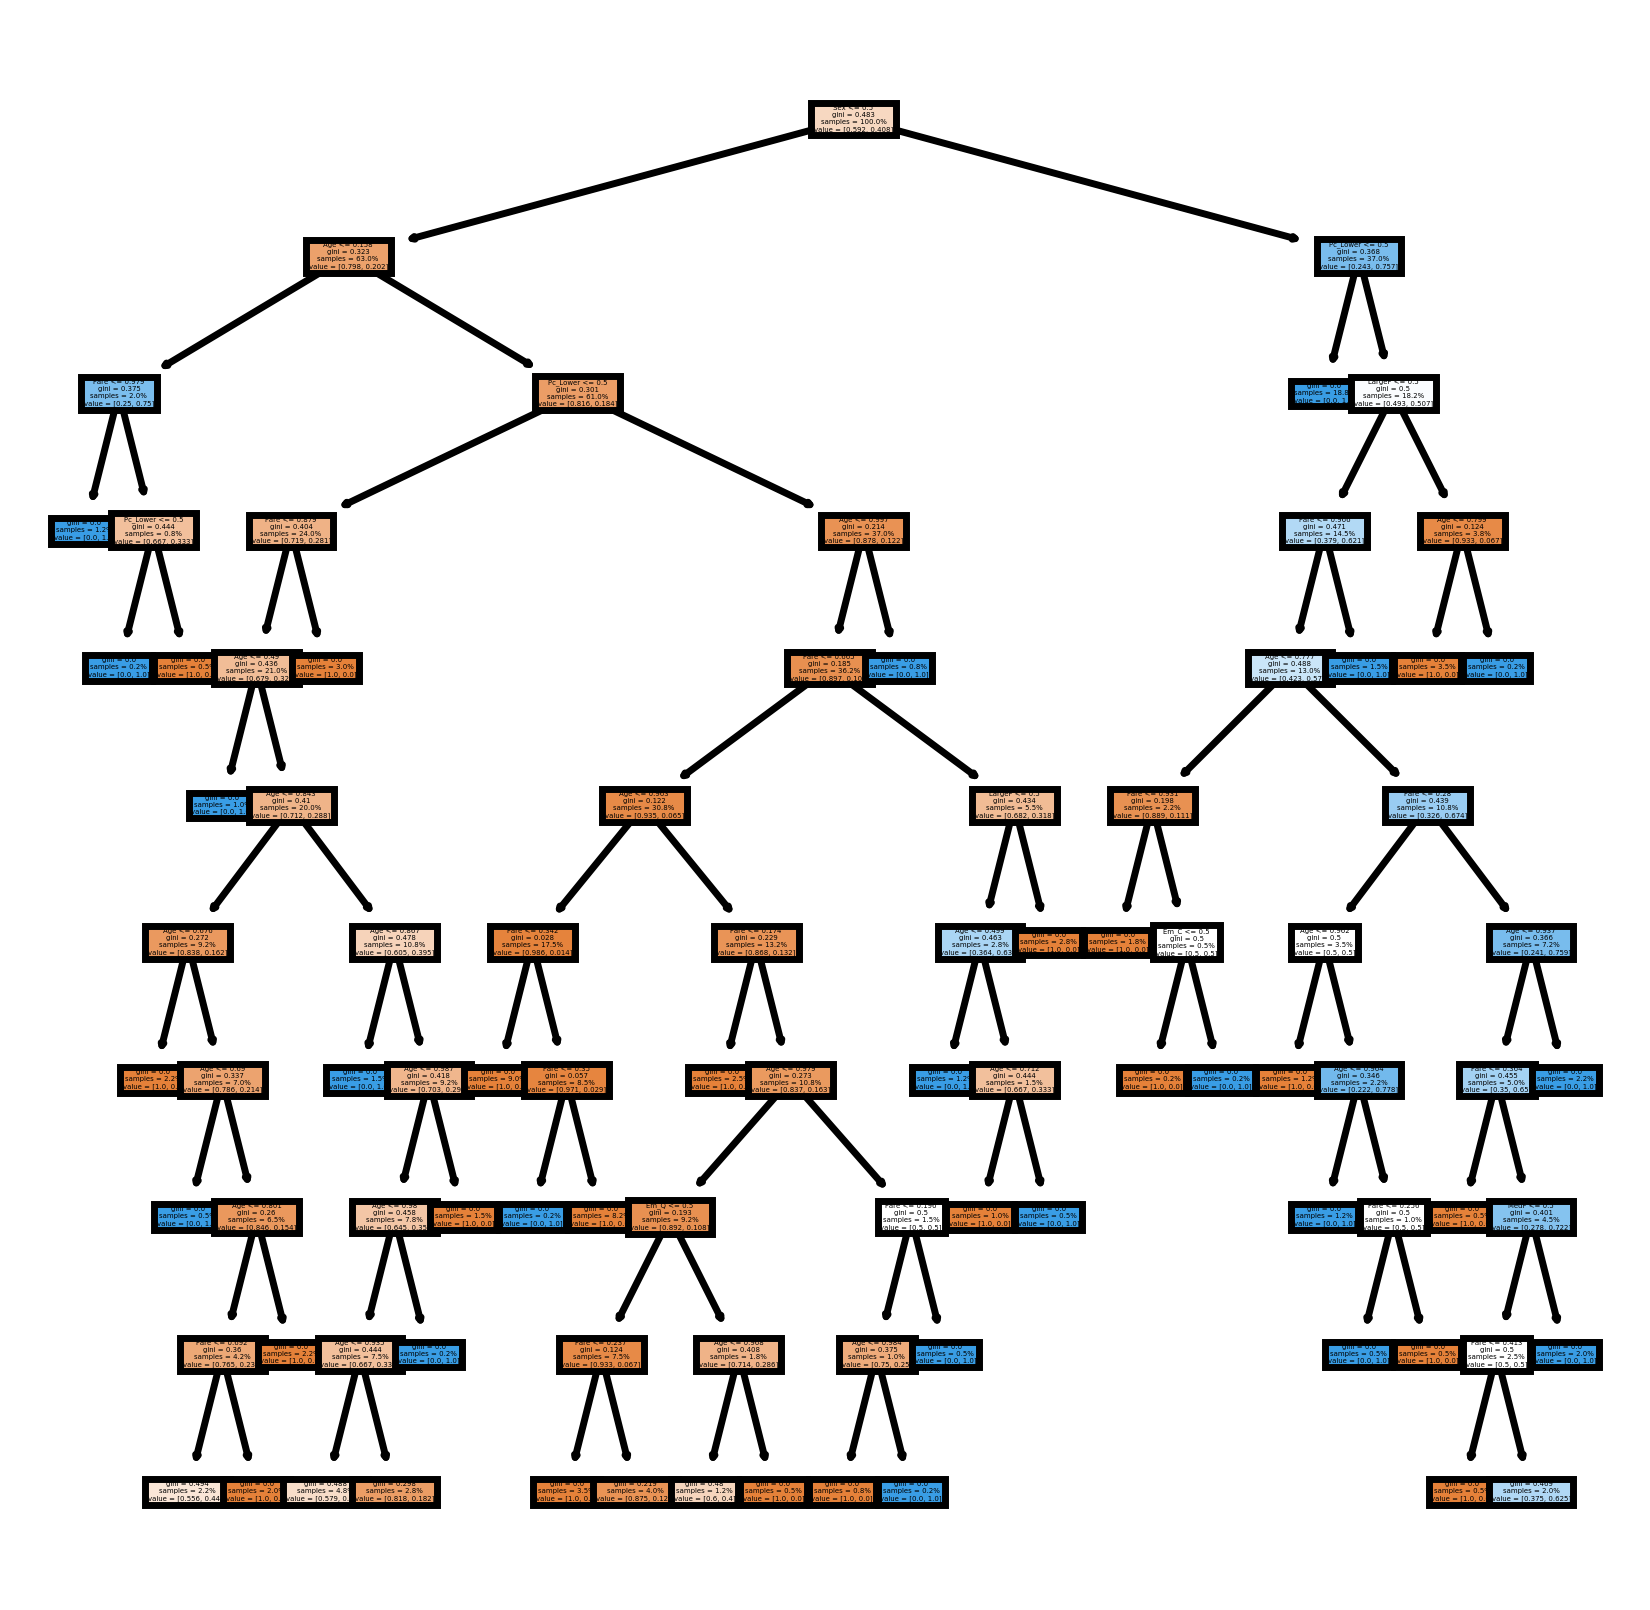

In [28]:
#Observación 1
predecir(x_test, y_test, 0)

Predicción: Died
Valor Real: Died
Probabilidad Regresión Logística: 0.29229954422940896
Naive Bayes: 0


0

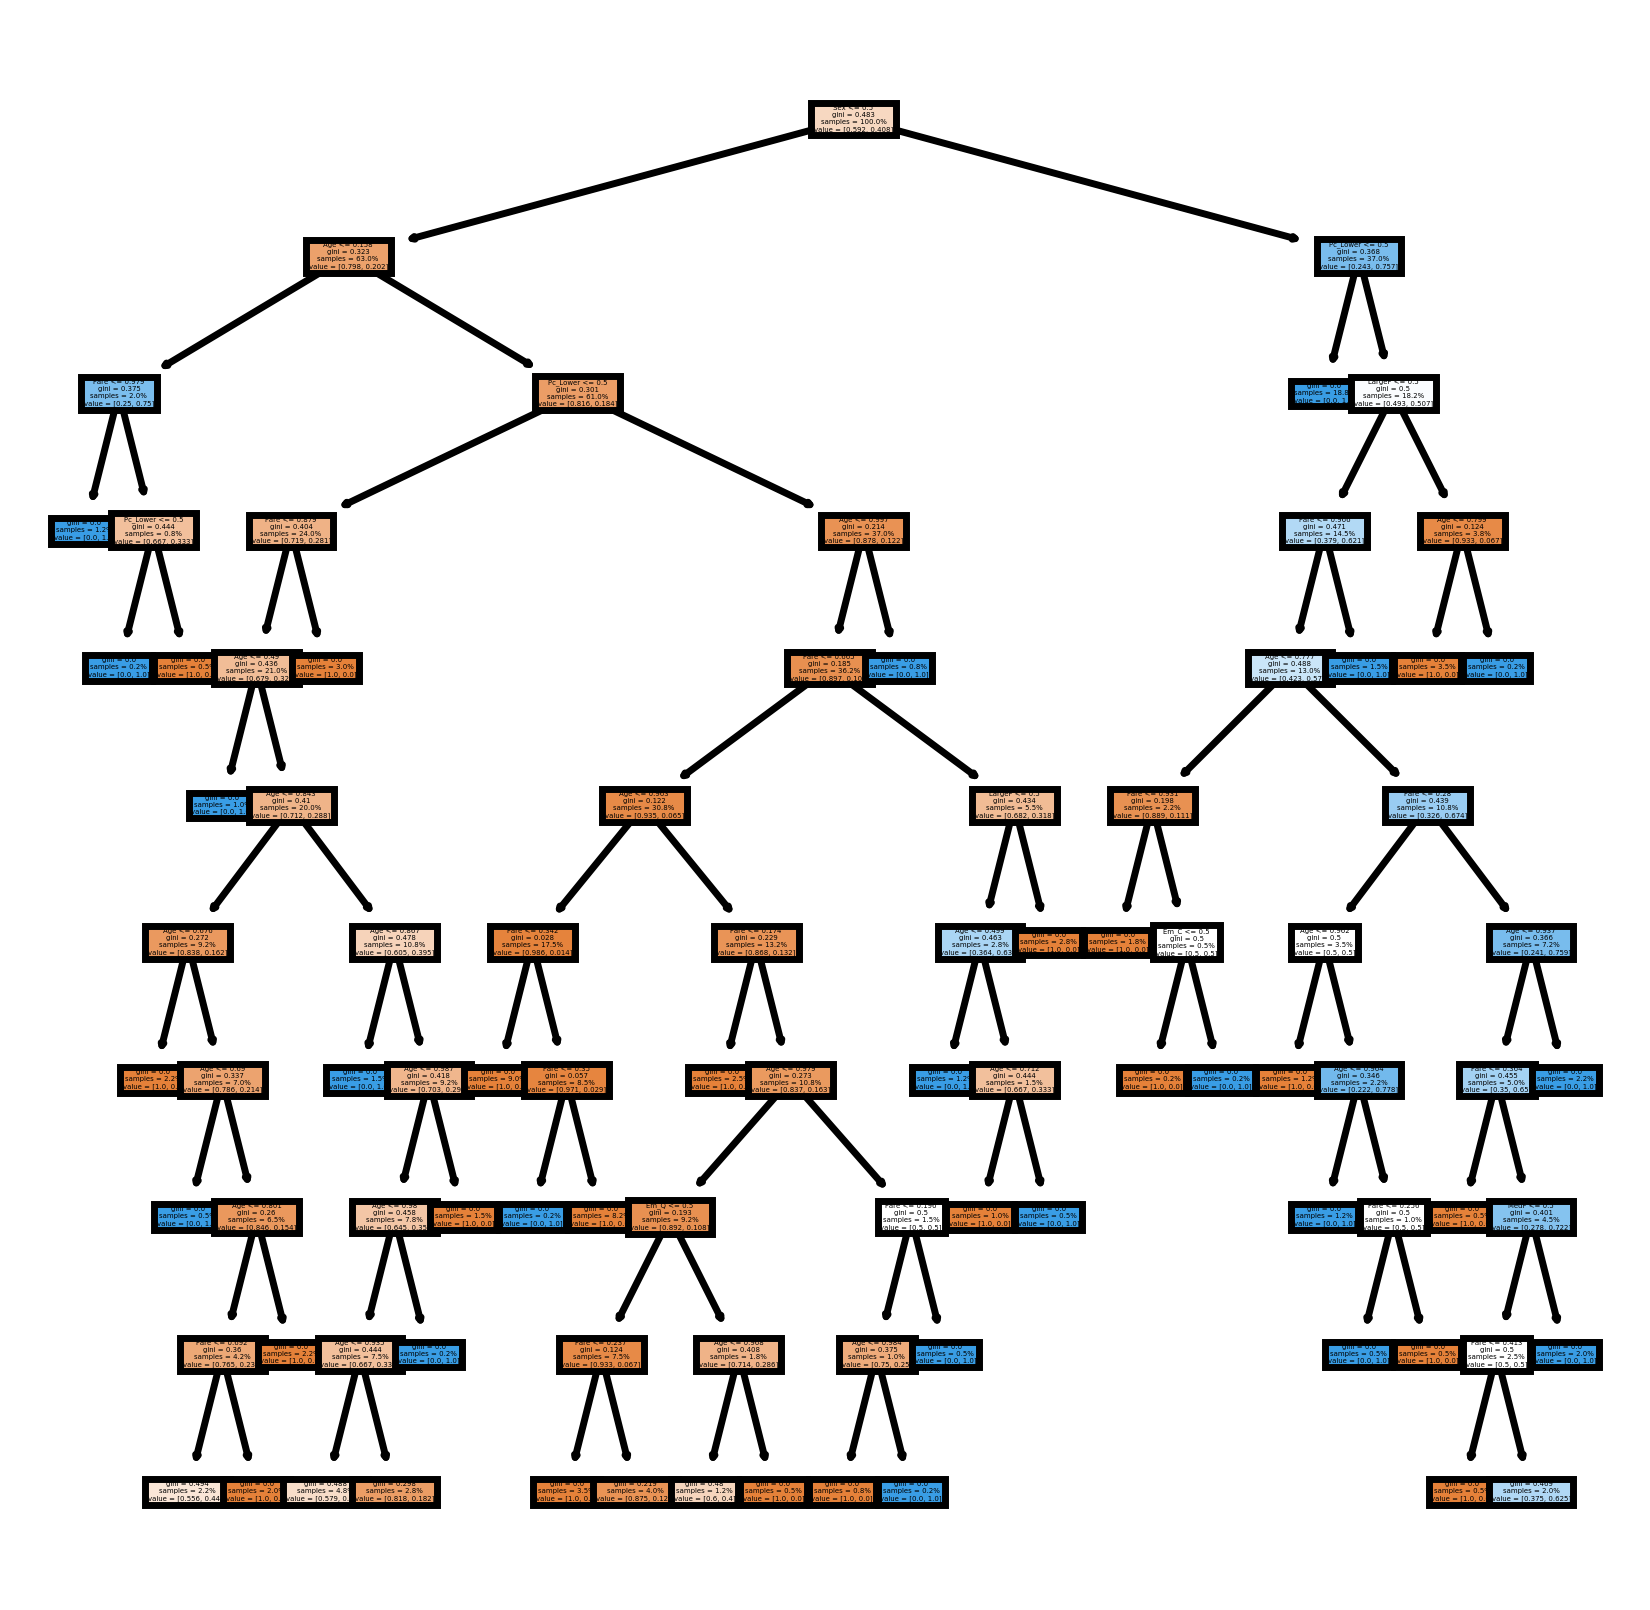

In [29]:
#Observación 2
predecir(x_test, y_test, 140)

Predicción: Died
Valor Real: Survived
Probabilidad Regresión Logística: 0.27854145265487973
Naive Bayes: 0


0

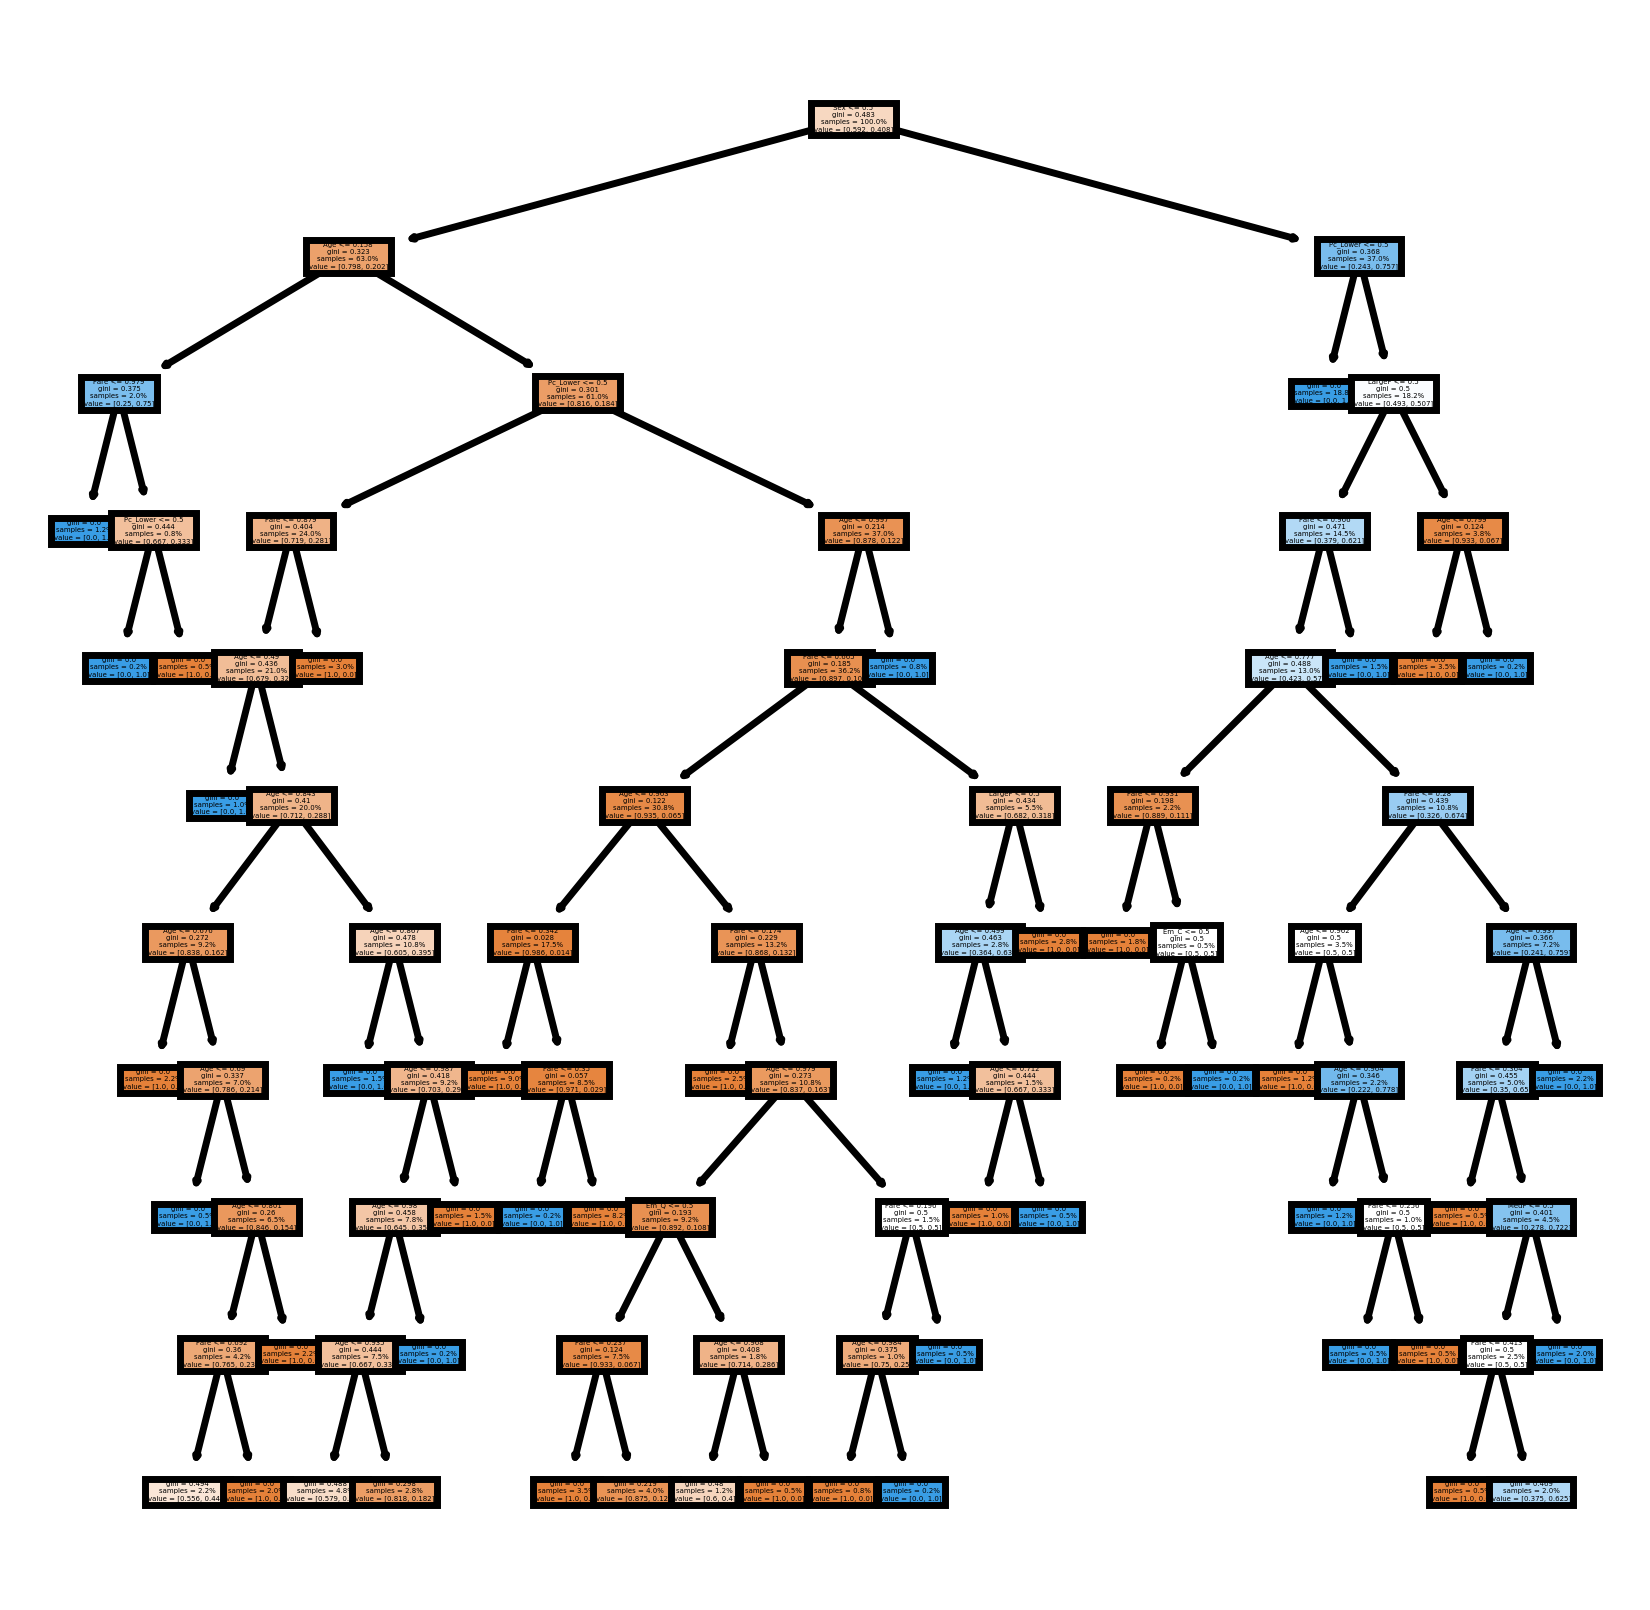

In [30]:
#Observación 3
predecir(x_test, y_test, 100)

Predicción: Died
Valor Real: Died
Probabilidad Regresión Logística: 0.23875498885406926
Naive Bayes: 0


0

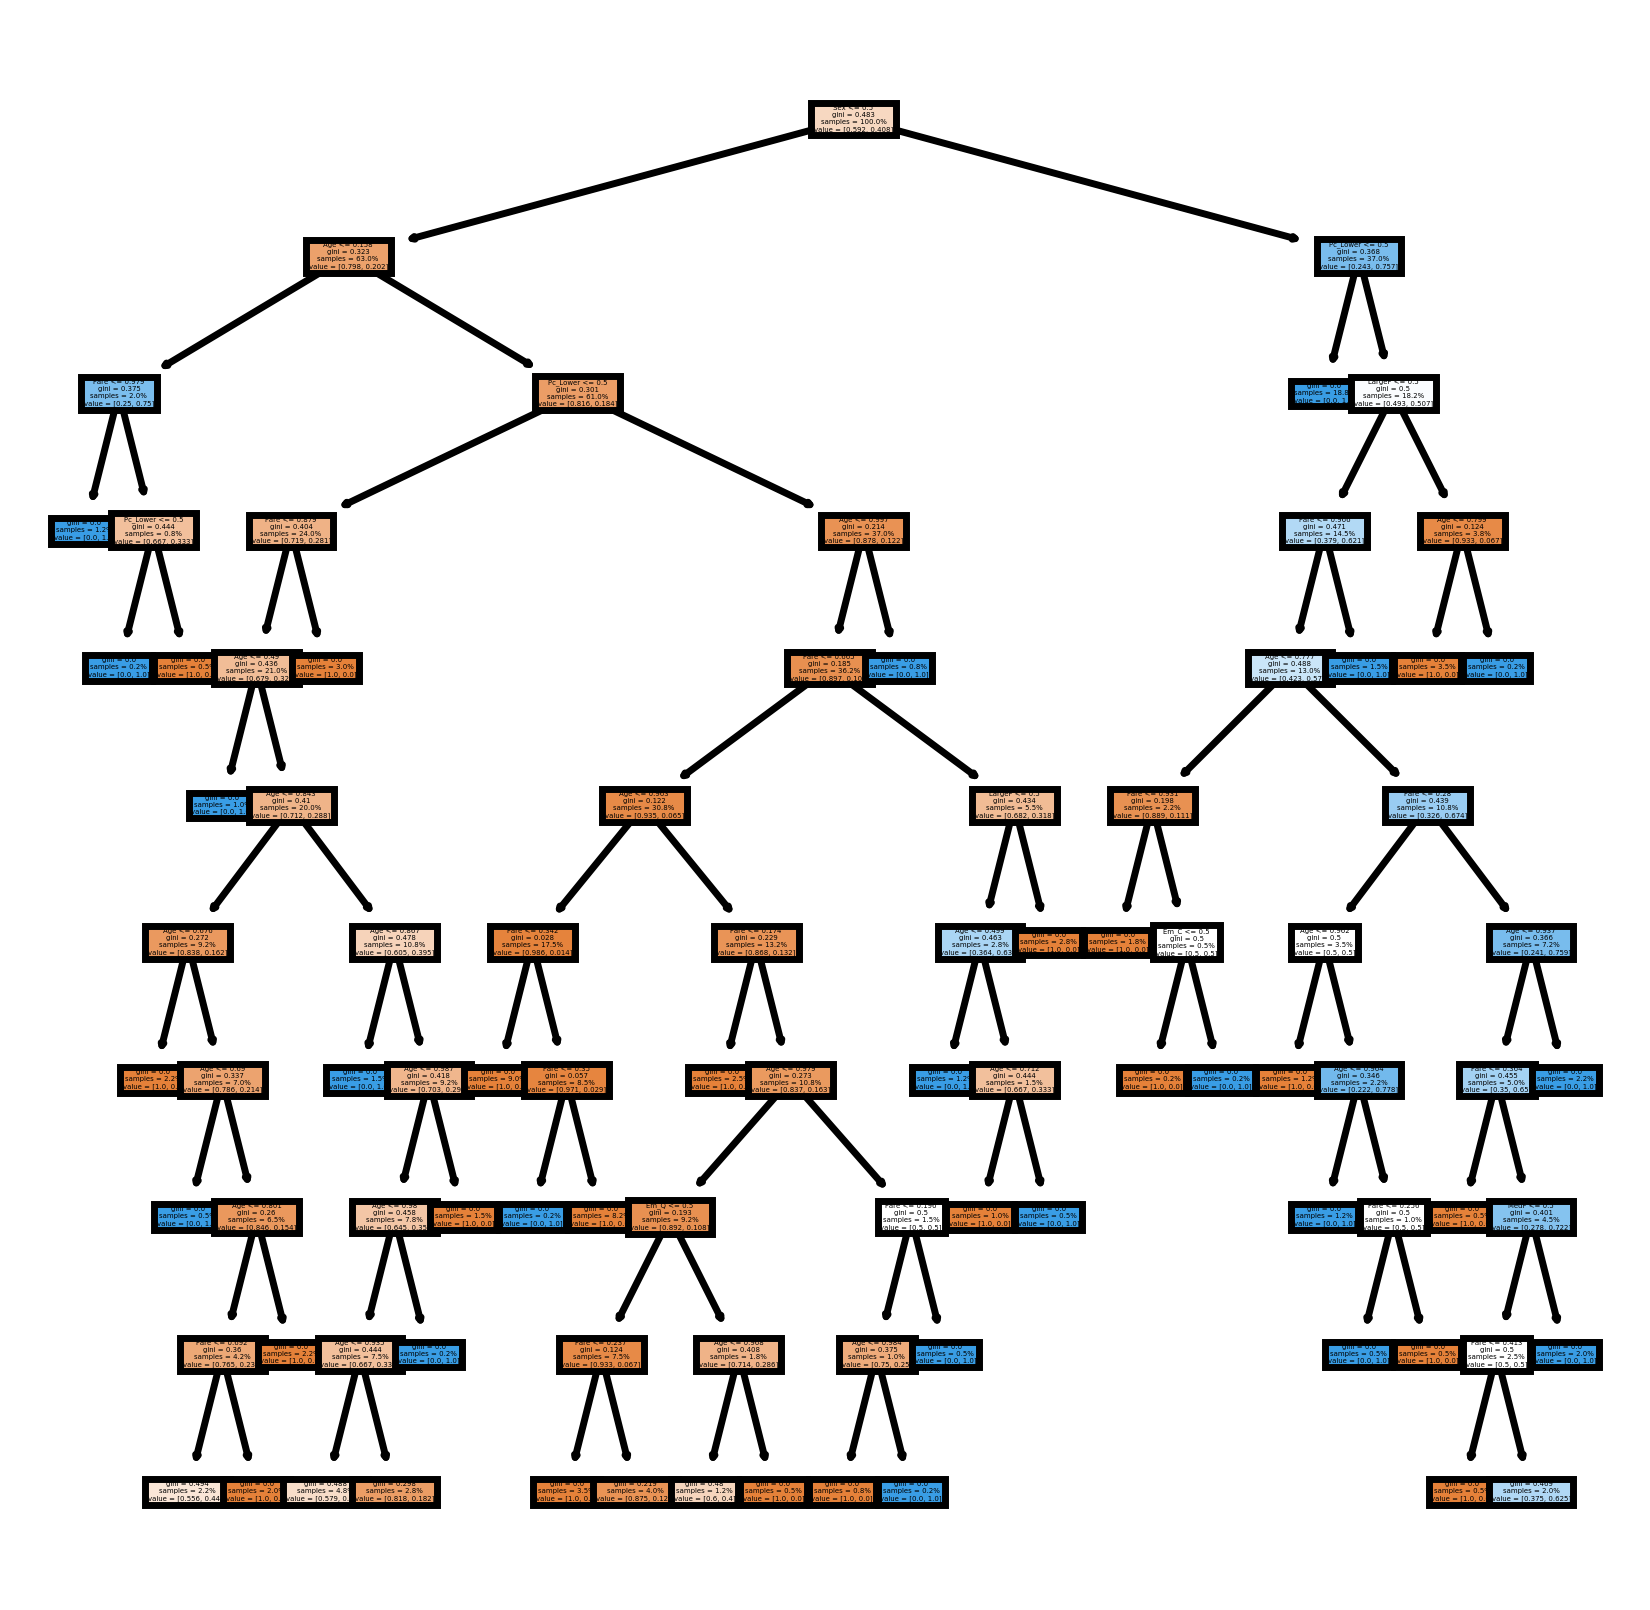

In [31]:
#Observación 4
predecir(x_test, y_test, 55)

Predicción: Survived
Valor Real: Survived
Probabilidad Regresión Logística: 0.2878371032682978
Naive Bayes: 1


1

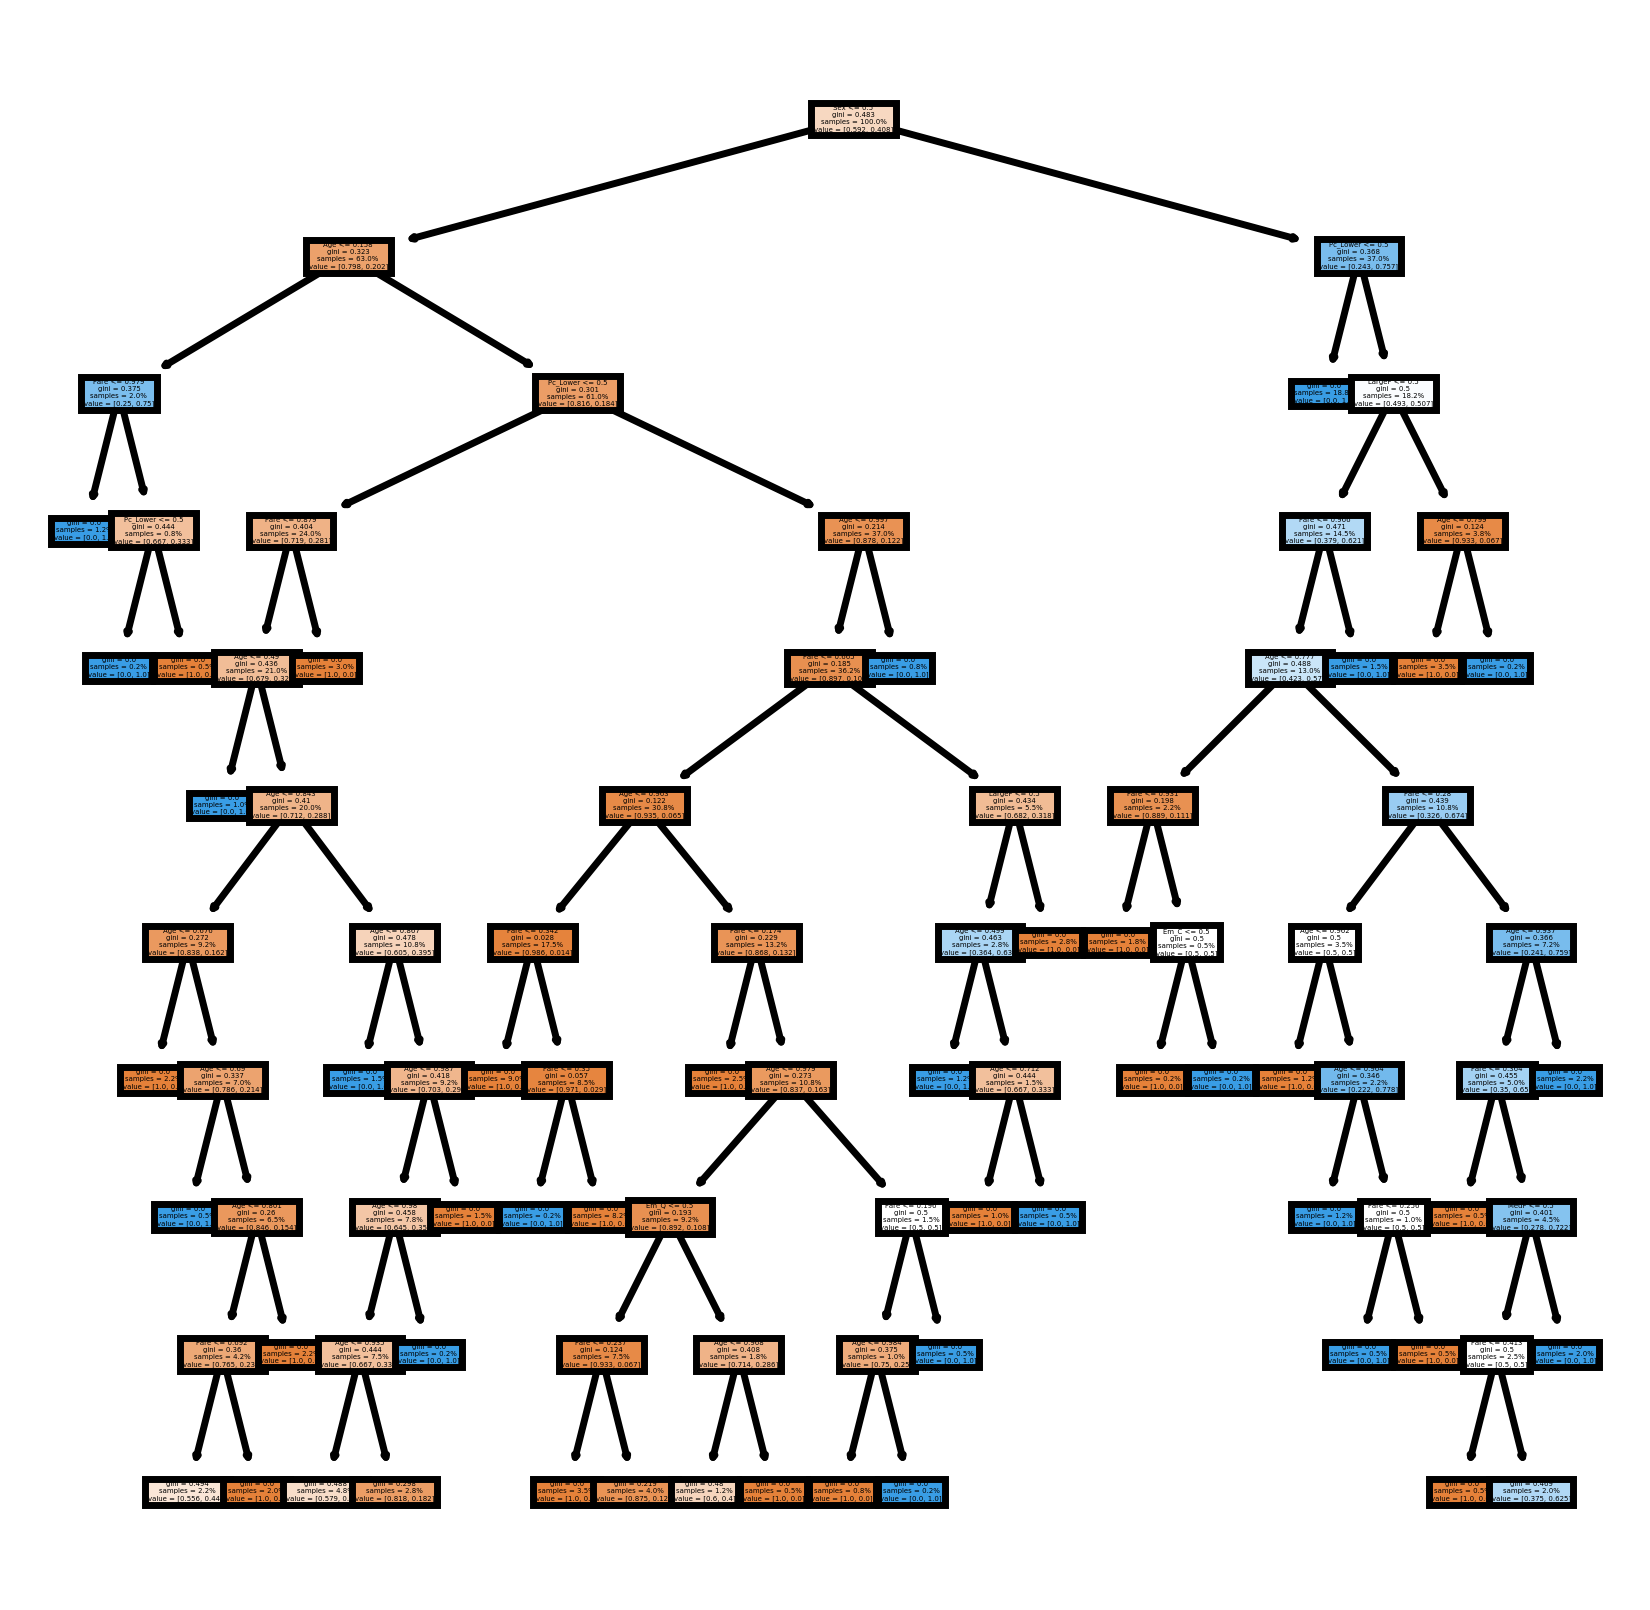

In [32]:
#Observación 5
predecir(x_test, y_test, 25)

Predicción: Died
Valor Real: Died
Probabilidad Regresión Logística: 0.24142306324800633
Naive Bayes: 0


0

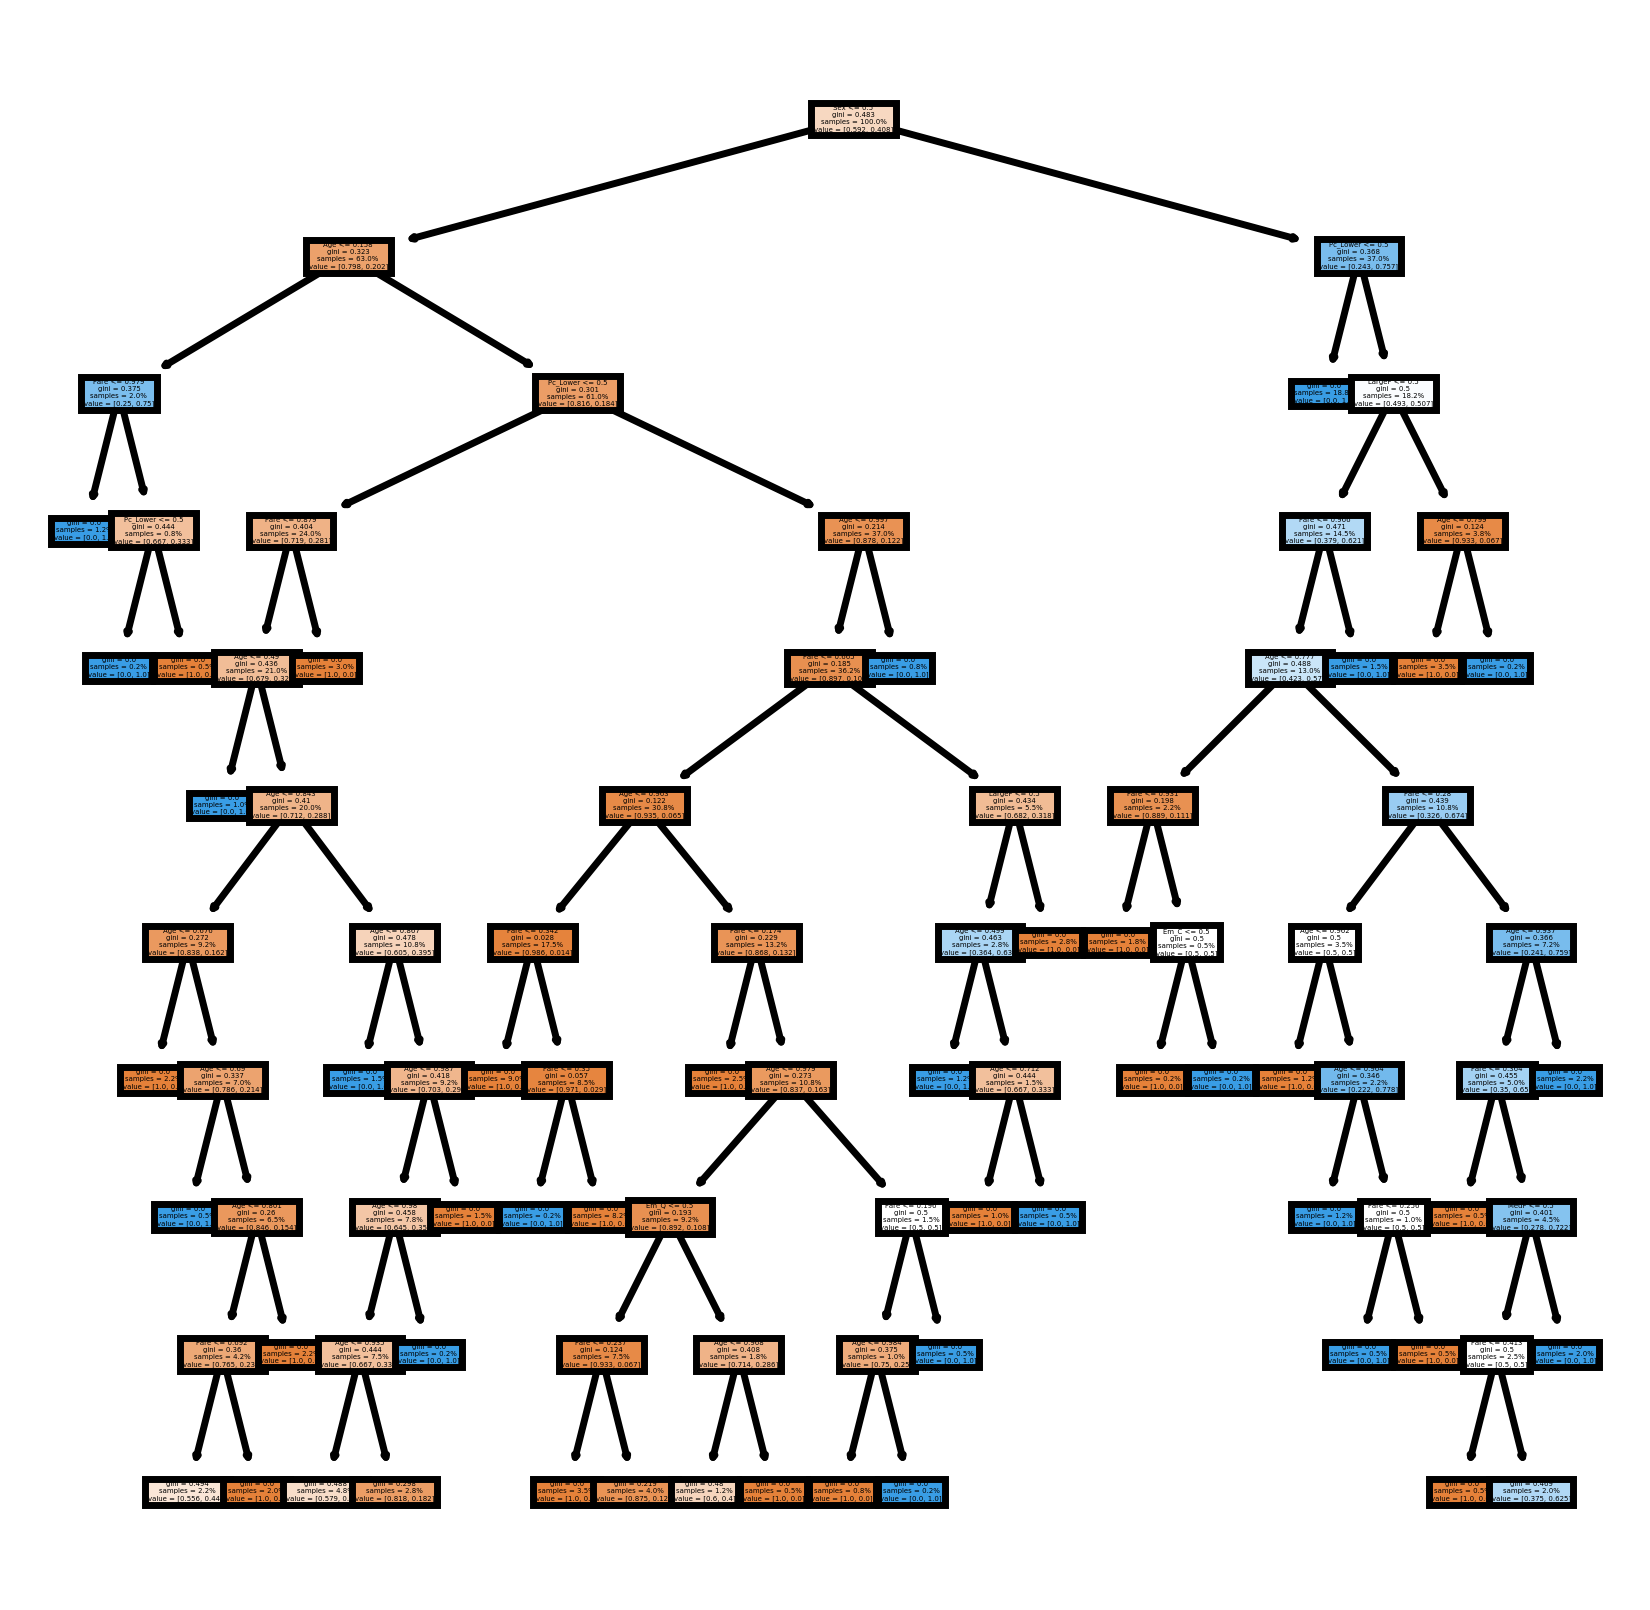

In [33]:
#Observación 6
predecir(x_test, y_test, 75)

Predicción: Survived
Valor Real: Survived
Probabilidad Regresión Logística: 0.5853681755129144
Naive Bayes: 1


1

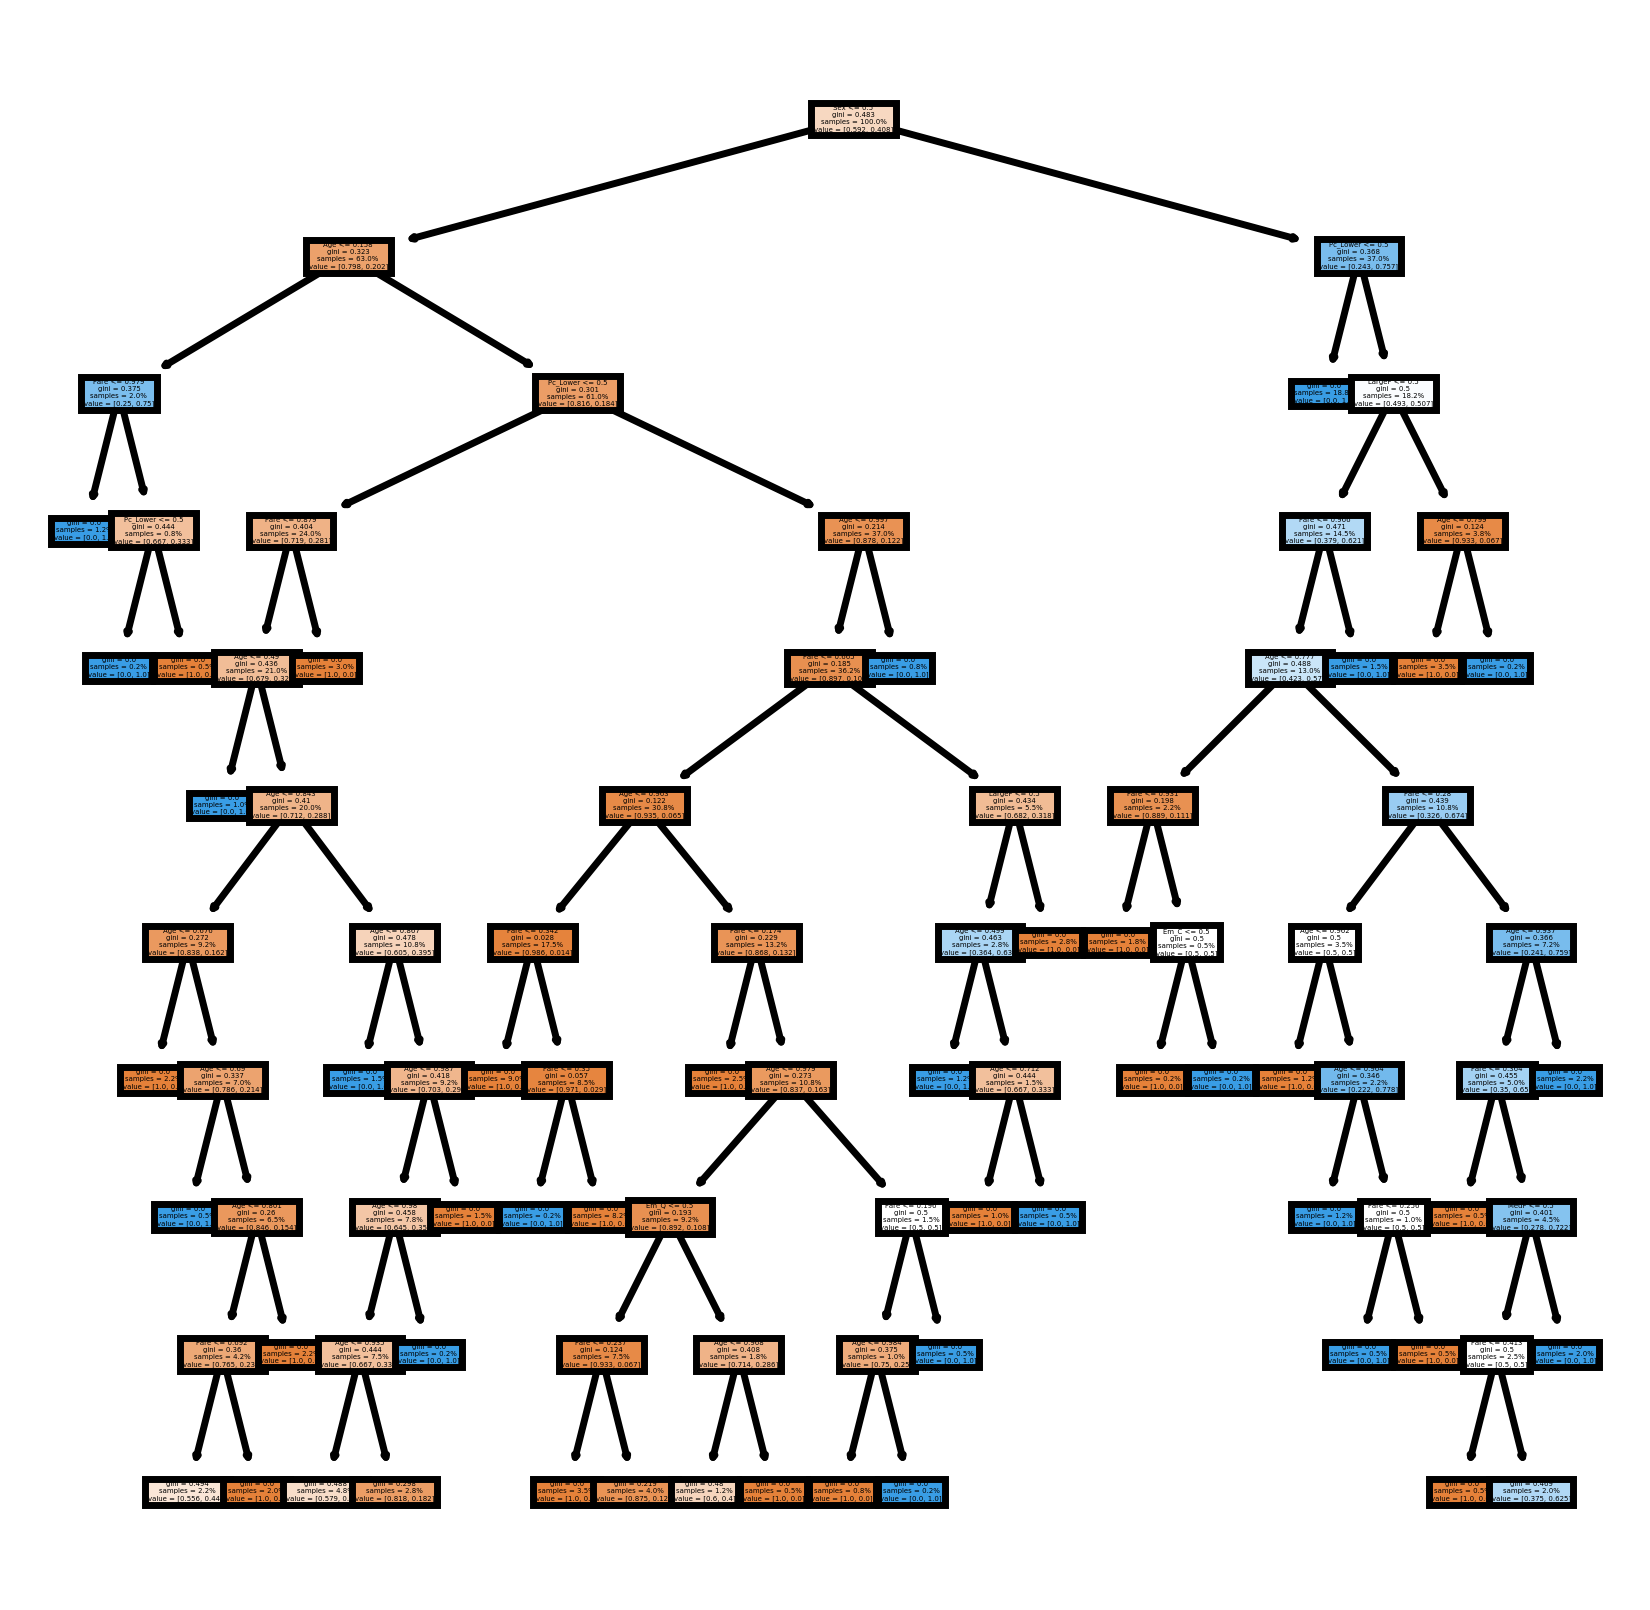

In [34]:
#Observación 7
predecir(x_test, y_test, 120)

Predicción: Died
Valor Real: Died
Probabilidad Regresión Logística: 0.24489899896969242
Naive Bayes: 0


0

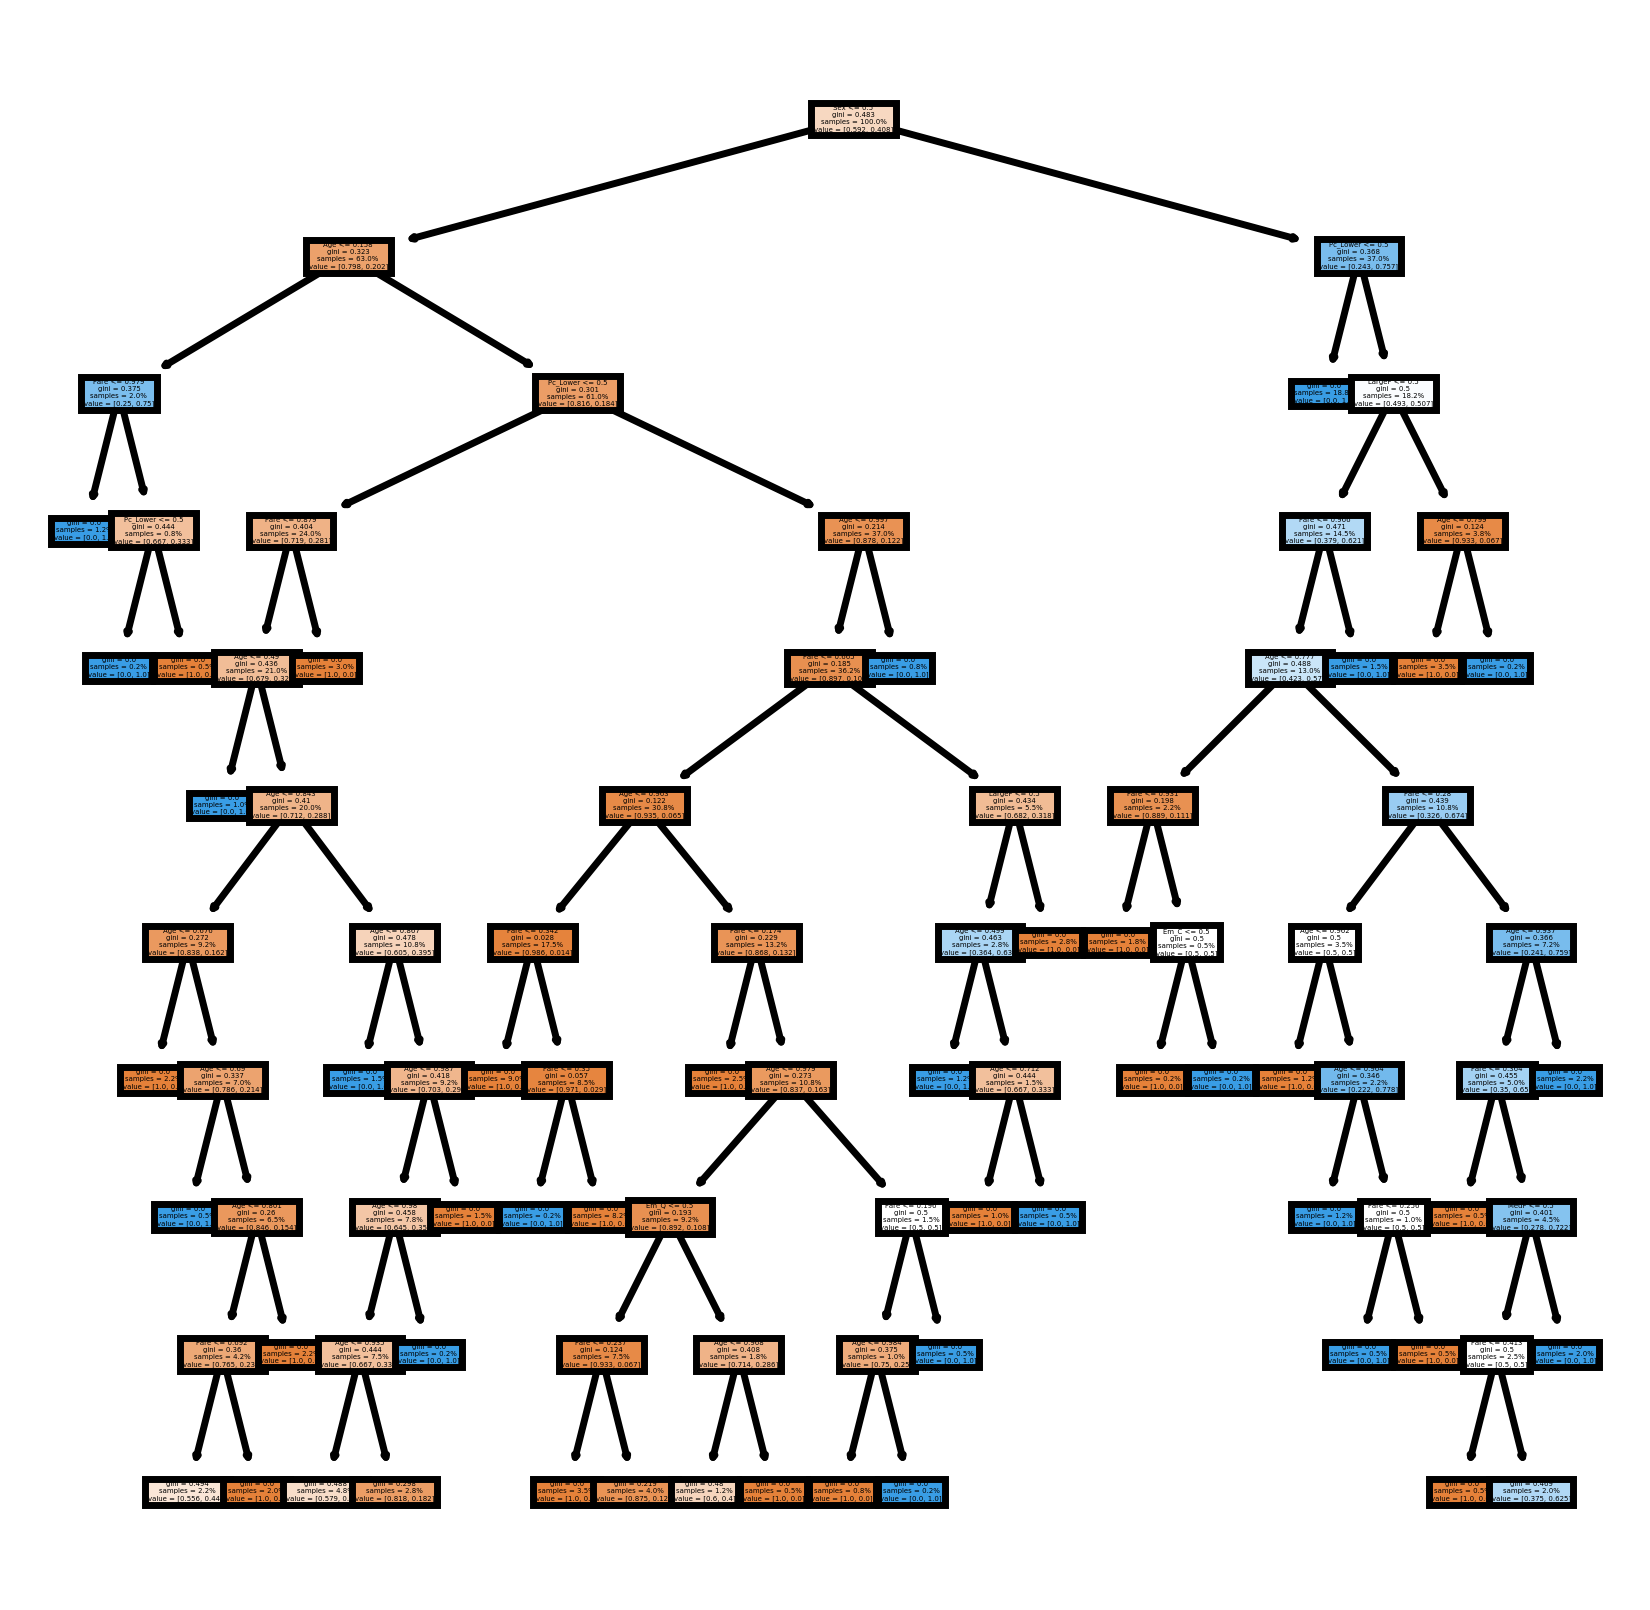

In [35]:
#Observación 8
predecir(x_test, y_test, 15)

Predicción: Survived
Valor Real: Survived
Probabilidad Regresión Logística: 0.5988119403372243
Naive Bayes: 0


1

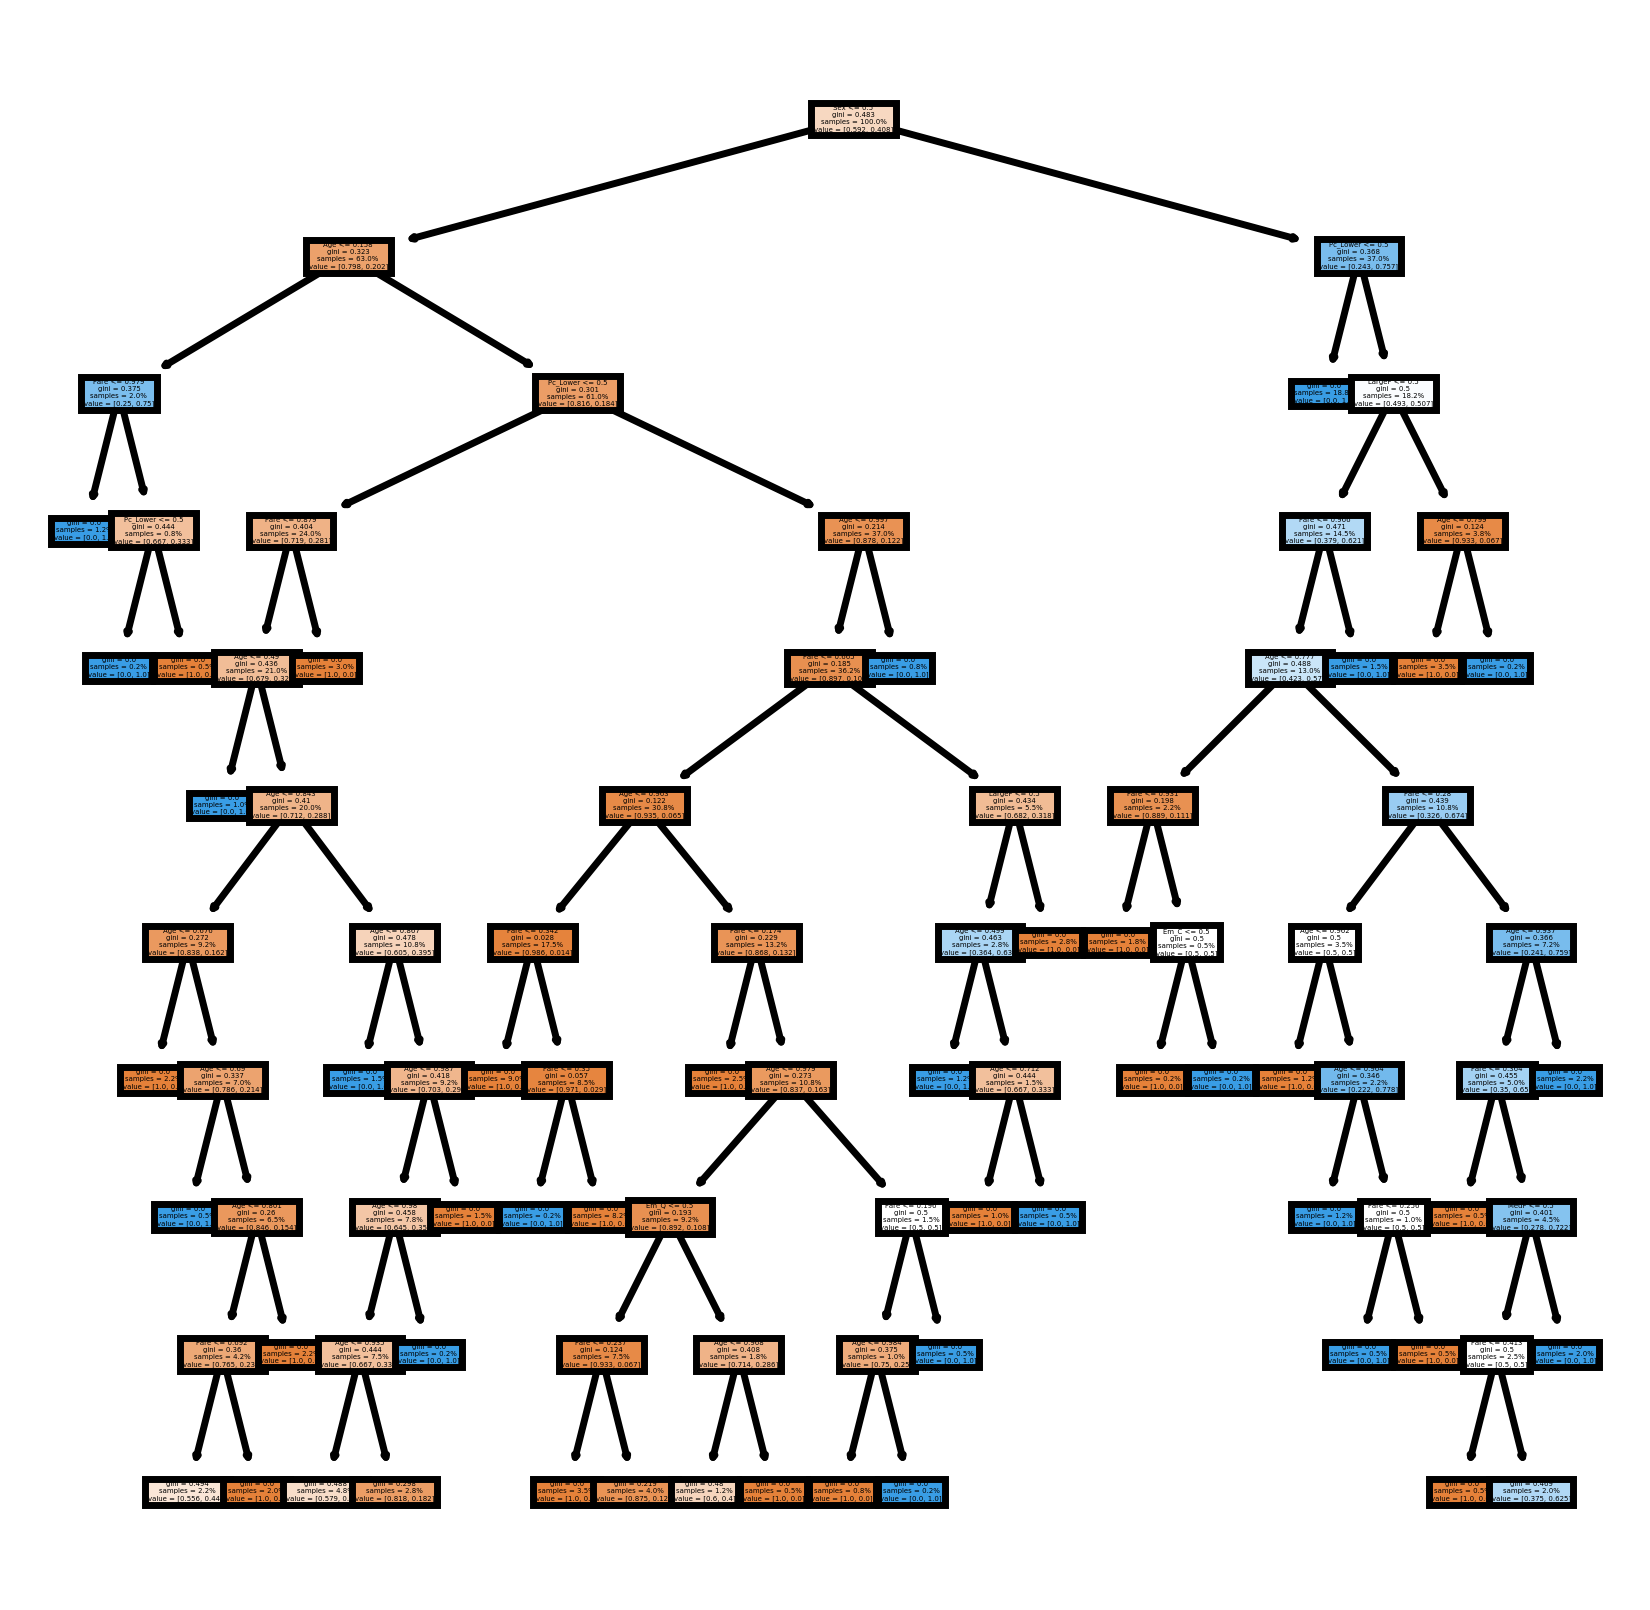

In [49]:
#Observación 9
predecir(x_test, y_test, 21)

Predicción: Died
Valor Real: Died
Probabilidad Regresión Logística: 0.24332854242142612
Naive Bayes: 0


0

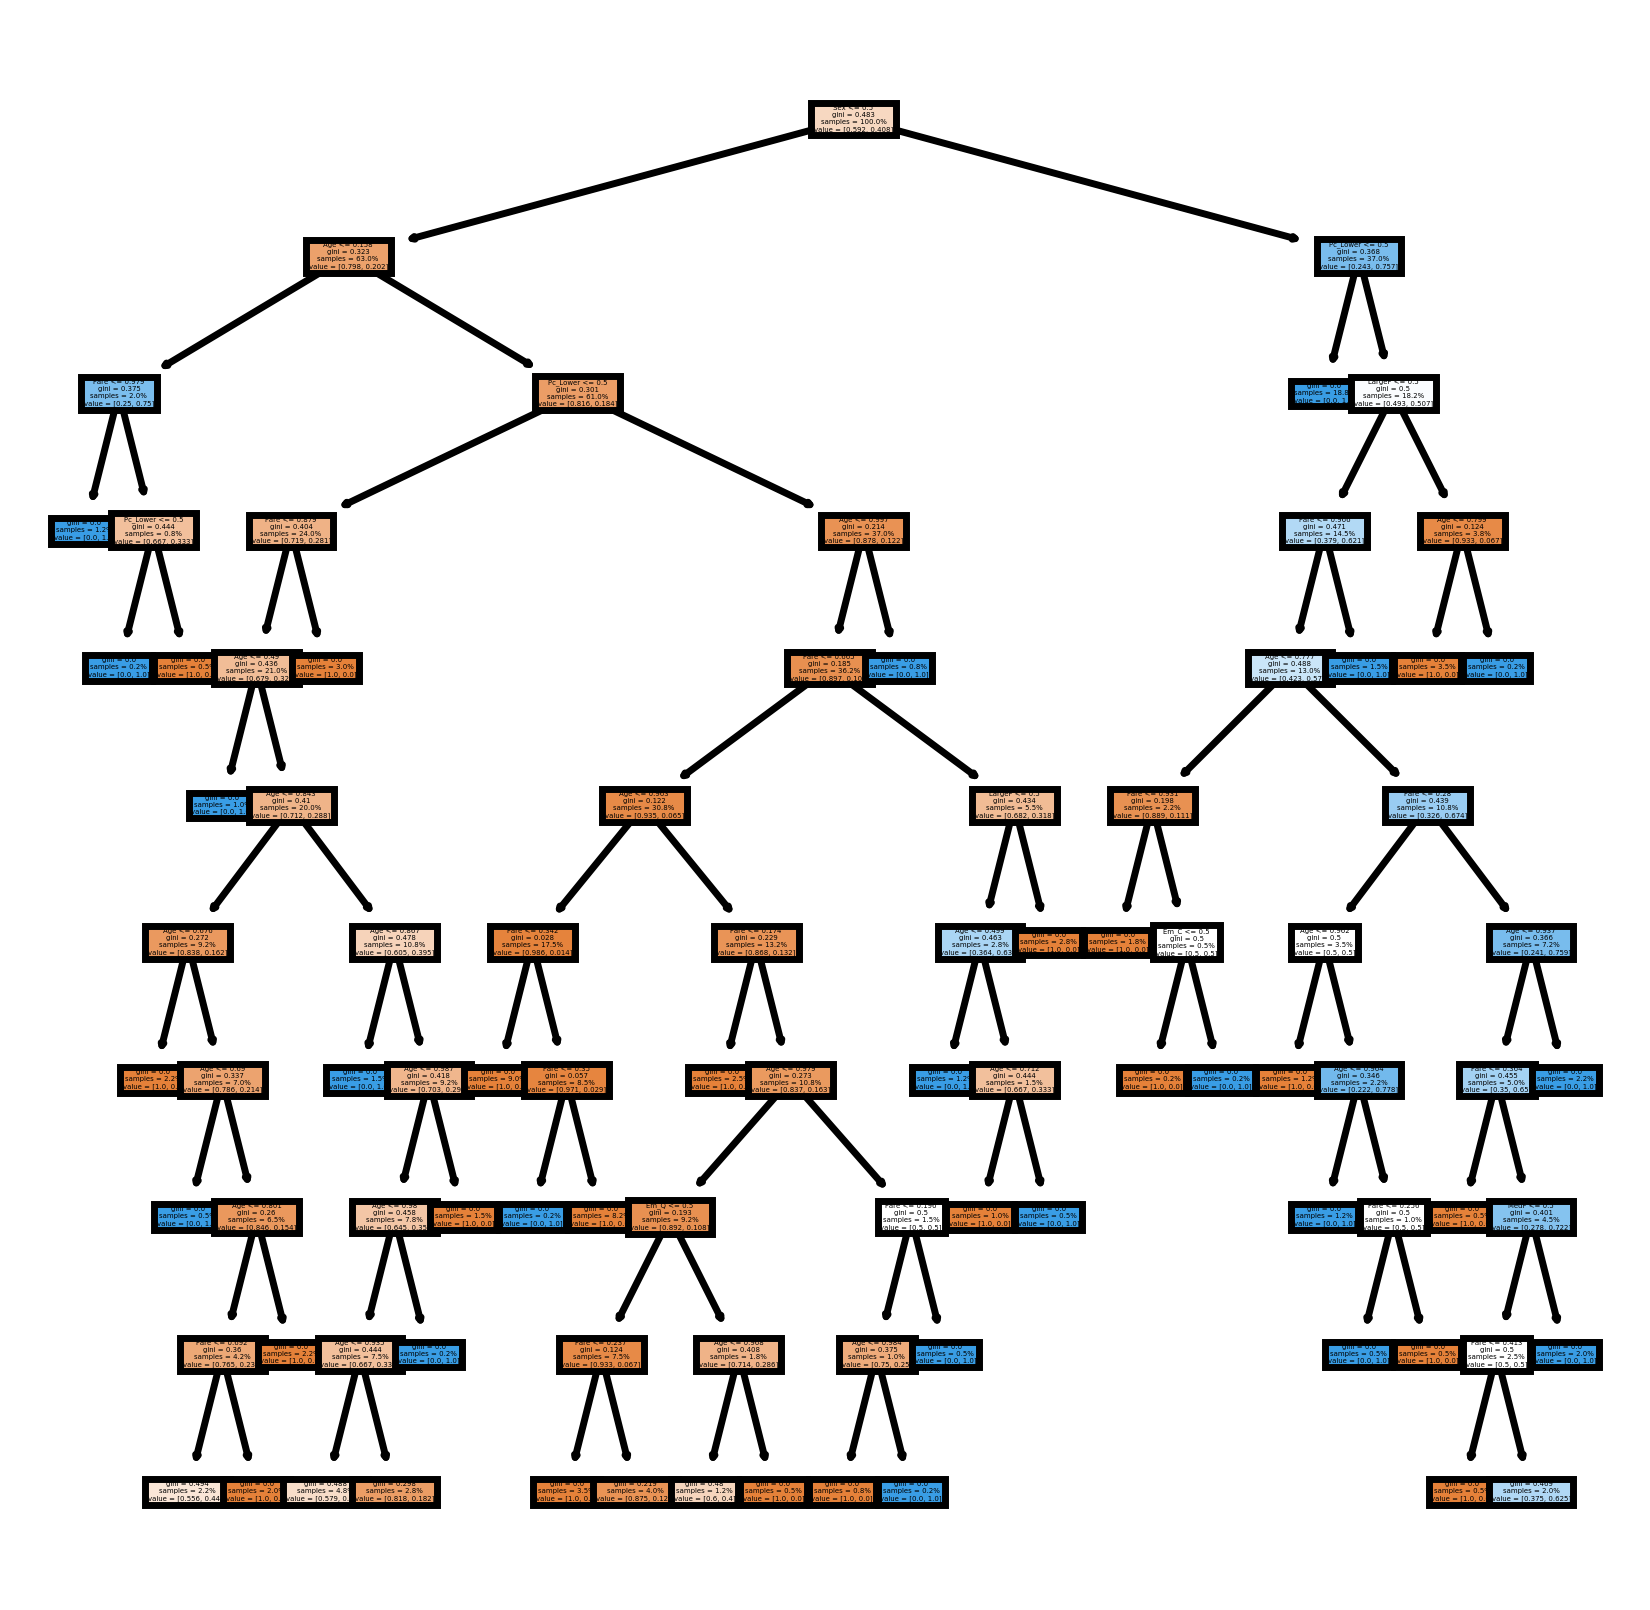

In [37]:
#Observación 10
predecir(x_test, y_test, 76)

En estas pruebas he podido corroborar que el modelo que tiene menor exactitud al momento de predecir es el de Naive Bayes